In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Shafiya mariyam\OneDrive\Documents\tourism_dataset.csv")

In [3]:
df.isnull().sum()

Location                   0
Country                    0
Category                   0
Visitors                   0
Rating                     0
Revenue                    0
Accommodation_Available    0
dtype: int64

In [4]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [5]:
wisker(df['Visitors'])

(np.float64(-495084.0), np.float64(1499244.0))

In [6]:
for i in ['Visitors','Revenue']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

In [7]:
dummy=pd.get_dummies(data=df,columns=["Country","Location","Category"],drop_first=True)

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [9]:
file_path = r"C:\Users\Shafiya mariyam\OneDrive\Documents\tourism_dataset.csv"
df = pd.read_csv(file_path)

In [10]:
df = df.drop(columns=['Location'], errors='ignore')  # Remove unique string identifier
data_encoded = pd.get_dummies(df, columns=['Country', 'Category', 'Accommodation_Available'], drop_first=True)

In [11]:
if 'Accommodation_Available_Yes' in data_encoded.columns:
    target_column = 'Accommodation_Available_Yes'
else:
    target_column = data_encoded.columns[-1]  # Use last column if target is unclear

X = data_encoded.drop(columns=[target_column])
y = data_encoded[target_column]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [14]:
reliability = np.mean(y_test == y_pred)  


class_distribution = np.bincount(y_pred) / len(y_pred)
fairness = min(class_distribution) / max(class_distribution) if len(class_distribution) > 1 else 1.0
scalability = len(df)

In [15]:
metrics = {
    'Scalability': len(df),  # Example proxy metric for dataset size
    'Accuracy': accuracy,
    'Precision': precision,
    'Reliability': reliability,
    'Fairness': fairness,
}

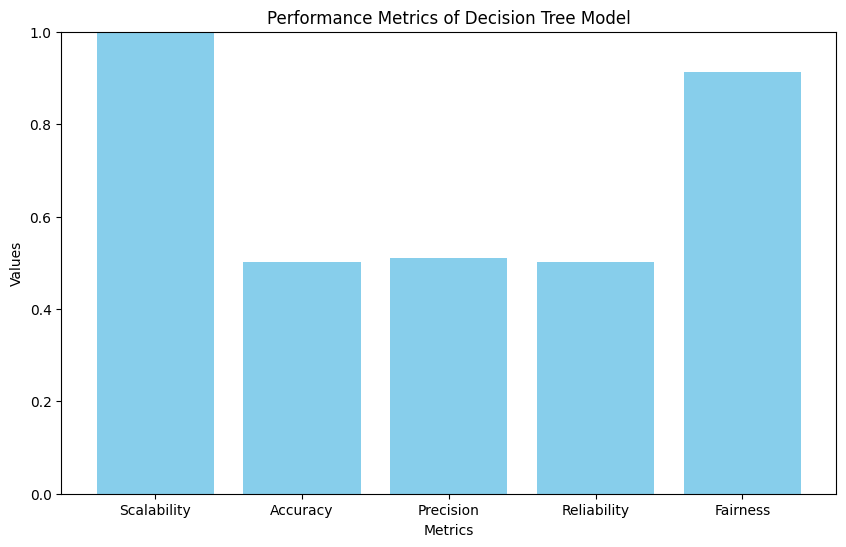

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics of Decision Tree Model')
plt.ylim(0, 1)  # Normalized metrics range
plt.show()

In [17]:
accuracy_percentage = accuracy * 100

# Print accuracy percentage
print(f"Accuracy: {accuracy_percentage:.2f}%")


Accuracy: 50.25%


In [18]:
def predict_accommodation(input_data):
    # Ensure the input is formatted the same as the training data
    input_df = pd.DataFrame([input_data])
    input_encoded = pd.get_dummies(input_df, columns=['Country', 'Category'], drop_first=True)
    input_encoded = input_encoded.reindex(columns=X.columns, fill_value=0)
    
    prediction = dt_model.predict(input_encoded)
    return "Accommodation Available" if prediction[0] == 1 else "Accommodation Not Available"

In [19]:
user_input = {
    'Country': 'France',  
    'Category': 'Cultural', 
    'Revenue': 547893.24,  
    'Visitors': 124867,  
    'Rating': 1.43,  
}
prediction_result = predict_accommodation(user_input)
print("Prediction:", prediction_result)

Prediction: Accommodation Not Available


In [20]:
print("Metrics Summary:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Metrics Summary:
Scalability: 5989.0000
Accuracy: 0.5025
Precision: 0.5112
Reliability: 0.5025
Fairness: 0.9137


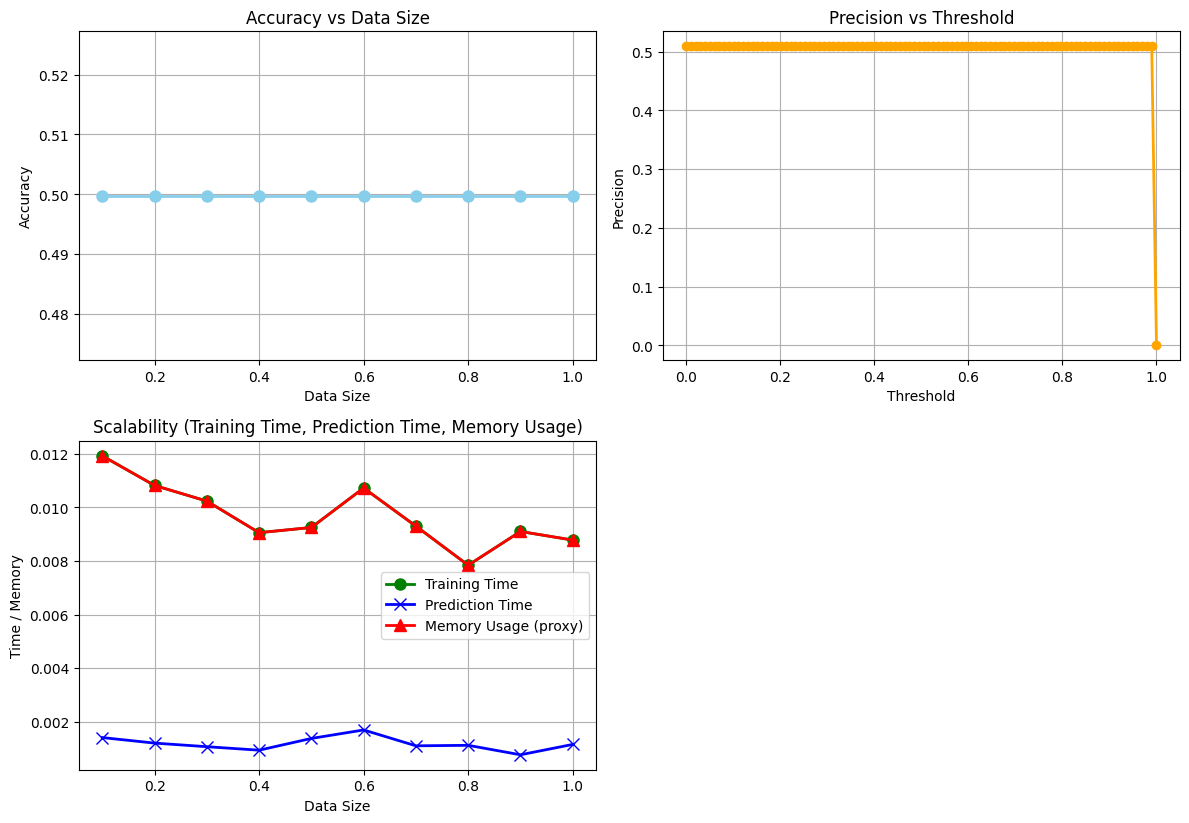

In [28]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Sample data for testing (replace with actual dataset)
# Assuming data is already loaded and preprocessed into `X` and `y`

# Placeholder for the dataset
# X, y = data_encoded.drop(columns=[target_column]), data_encoded[target_column]

# Define functions to measure training time, prediction time, and memory usage
def measure_scalability(model, X_train, X_test, y_train, y_test):
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    start_pred = time.time()
    y_pred = model.predict(X_test)
    end_pred = time.time()

    training_time = end_train - start_train
    prediction_time = end_pred - start_pred
    return training_time, prediction_time

# 1. Accuracy vs Data Size
data_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
accuracies = []

for size in data_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X, y, train_size=0.2, random_state=42)
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_subset, y_train_subset)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot Accuracy vs Data Size
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.plot(data_sizes, accuracies, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.title('Accuracy vs Data Size')
plt.xlabel('Data Size')
plt.ylabel('Accuracy')
plt.grid(True)

# 2. Precision vs Threshold
thresholds = np.linspace(0, 1, 100)
precisions = []

for threshold in thresholds:
    y_pred_threshold = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    precisions.append(precision)

# Plot Precision vs Threshold
plt.subplot(3, 2, 2)
plt.plot(thresholds, precisions, marker='o', color='orange', linestyle='-', linewidth=2, markersize=6)
plt.title('Precision vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.grid(True)

# 3. Scalability (Training Time, Prediction Time, Memory Usage)
# Simulate measurement of training time, prediction time (in seconds), and memory usage
train_times = []
pred_times = []
memory_usage = []  # For simplicity, using training time as a proxy for memory usage
for size in data_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X, y, train_size=0.2, random_state=42)
    model = DecisionTreeClassifier(random_state=42)
    train_time, pred_time = measure_scalability(model, X_train_subset, X_test, y_train_subset, y_test)
    train_times.append(train_time)
    pred_times.append(pred_time)
    memory_usage.append(train_time)  # Here, just using training time as a proxy for memory usage

# Plot Scalability (Training Time, Prediction Time, Memory Usage)
plt.subplot(3, 2, 3)
plt.plot(data_sizes, train_times, marker='o', color='green', linestyle='-', linewidth=2, markersize=8, label='Training Time')
plt.plot(data_sizes, pred_times, marker='x', color='blue', linestyle='-', linewidth=2, markersize=8, label='Prediction Time')
plt.plot(data_sizes, memory_usage, marker='^', color='red', linestyle='-', linewidth=2, markersize=8, label='Memory Usage (proxy)')
plt.title('Scalability (Training Time, Prediction Time, Memory Usage)')
plt.xlabel('Data Size')
plt.ylabel('Time / Memory')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


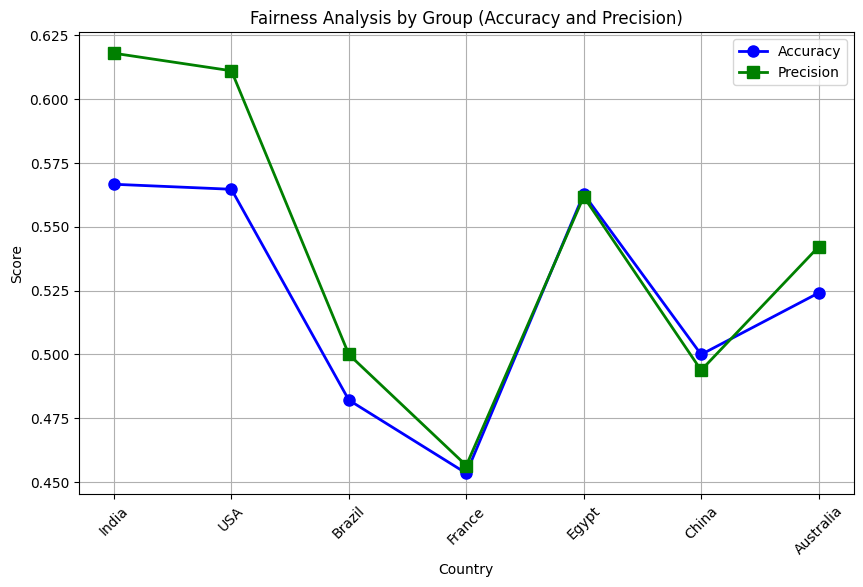

In [30]:
# Function to check fairness by a specific group (e.g., 'Country') using Decision Tree
def plot_fairness_by_group(data, group_column='Country'):
    accuracy_groupwise = []
    precision_groupwise = []
    
    if group_column in data.columns:
        groups = data[group_column].unique()
        for group in groups:
            group_data = data[data[group_column] == group]
            X_group = group_data.drop(columns=['Accommodation_Available'], axis=1)
            Y_group = group_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
            
            # Split data
            X_train, X_test, Y_train, Y_test = train_test_split(X_group, Y_group, test_size=0.2, random_state=42)
            X_train = pd.get_dummies(X_train, drop_first=True)
            X_test = pd.get_dummies(X_test, drop_first=True)
            X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
            
            # Train and predict using Decision Tree
            model = DecisionTreeClassifier(random_state=42)
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)
            
            # Calculate Accuracy and Precision Score
            accuracy = accuracy_score(Y_test, Y_pred)
            precision = precision_score(Y_test, Y_pred)
            
            accuracy_groupwise.append(accuracy)
            precision_groupwise.append(precision)

        # Plot fairness metrics (Accuracy and Precision per group) as line plots
        plt.figure(figsize=(10, 6))
        plt.plot(groups, accuracy_groupwise, label='Accuracy', marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
        plt.plot(groups, precision_groupwise, label='Precision', marker='s', color='green', linestyle='-', linewidth=2, markersize=8)
        
        plt.xlabel(group_column)
        plt.ylabel('Score')
        plt.title('Fairness Analysis by Group (Accuracy and Precision)')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column '{group_column}' not found in data.")

# Run fairness analysis by 'Country' column
plot_fairness_by_group(df)  # Replace 'data' with your actual DataFrame


Run 1/10
Run 1 completed - Accuracy: 0.48914858096828046, Precision: 0.5
Run 2/10
Run 2 completed - Accuracy: 0.48914858096828046, Precision: 0.5
Run 3/10
Run 3 completed - Accuracy: 0.48914858096828046, Precision: 0.5
Run 4/10
Run 4 completed - Accuracy: 0.48914858096828046, Precision: 0.5
Run 5/10
Run 5 completed - Accuracy: 0.48914858096828046, Precision: 0.5
Run 6/10
Run 6 completed - Accuracy: 0.48914858096828046, Precision: 0.5
Run 7/10
Run 7 completed - Accuracy: 0.48914858096828046, Precision: 0.5
Run 8/10
Run 8 completed - Accuracy: 0.48914858096828046, Precision: 0.5
Run 9/10
Run 9 completed - Accuracy: 0.48914858096828046, Precision: 0.5
Run 10/10
Run 10 completed - Accuracy: 0.48914858096828046, Precision: 0.5


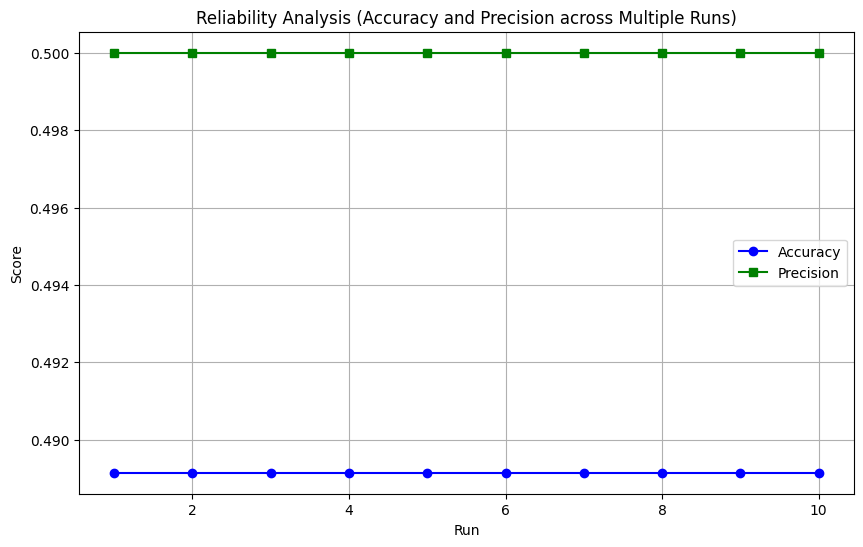

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Function to check model reliability over multiple runs using Decision Tree
def plot_reliability(data, num_runs=10):
    accuracy_scores = []
    precision_scores = []
    
    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs}")  # Print which run is being processed
        X = data.drop(columns=['Accommodation_Available'], axis=1)
        Y = data['Accommodation_Available'].map({'Yes': 1, 'No': 0})

        # Split data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        
        X_train = pd.get_dummies(X_train, drop_first=True)
        X_test = pd.get_dummies(X_test, drop_first=True)
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
        
        # Initialize and train the Decision Tree model
        model = DecisionTreeClassifier(random_state=42)
        model.fit(X_train, Y_train)

        # Predict and evaluate
        Y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(Y_test, Y_pred)
        precision = precision_score(Y_test, Y_pred)
        
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        print(f"Run {run + 1} completed - Accuracy: {accuracy}, Precision: {precision}")  # Print the scores of each run

    # Plot Accuracy and Precision Scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_runs + 1), accuracy_scores, label='Accuracy', marker='o', color='blue')
    plt.plot(range(1, num_runs + 1), precision_scores, label='Precision', marker='s', color='green')
    plt.xlabel('Run')
    plt.ylabel('Score')
    plt.title('Reliability Analysis (Accuracy and Precision across Multiple Runs)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run reliability analysis on the data
plot_reliability(df)  # Replace 'data' with your actual DataFrame
